# A Diabetes Classifier
link to dataset: [diabetes dataset](https://www.kaggle.com/mathchi/diabetes-data-set)

Goal: The goal of this project is to develop a good conservative diabetes classifier. Conservative here is in the sense that we'd like
to have a maximize recall. Good is in the sense that we still want our classifier to have
reasonable accuracy.

The project is organized as follows:


1. EDA, Understanding the Data
- Clean Data
- Impute Missing Data
- Data Visualization
- Selecting Features
- Ideas for Introduction of Features
2. Model Building Idea, Functions for Visualization
- Conservative model building philosophy
- Testing and visualizing different models, including:
3. Model Building and Feature Experimentation
- Many models tested with all data scaled. Classifiers included are
    * Dummy classifier, for comparison.
    * Gradient Boosting Classifier
    * Logistic Regression
    * Support Vector Machine
    * Random Forest
    * K Nearest Neighbors
    * Decision Tree Classifier
- One-Hot Encoding on age, then on age and BMI, then just om BMI with gradient boosting classifiers and logistic regression tested.

# Summary
- Out of the models that are tested, the following produced reasonable results: Gradient Boosting, Logistic Regression, and Random Forest. It appears that the one-hot encoding does provide minor imporovement for gradient boosting classification, but not for logistic regression. The following is a summary of the models (all with numerical data) on the test set (with a random state of 0):


- Gradient Boosting:
    * All data numerical:
        * Recall: 63%
        * Accuracy: 77%
    * One-Hot on just Age
        * Recall: 73%
        * Accuracy: 80%
    * One-Hot on Age, BMI
        * Recall: 61%
        * Accuracy: 77%
    * One-Hot on just BMI
        * Recall: 65%
        * Accuracy: 77%
        

- Logistic Regression:
    * All data numerical:
        * Recall: 84%
        * Accuracy: 76%
    * One-Hot on just Age
        * Recall: 81%
        * Accuracy: 78%
    * One-Hot on Age, BMI
        * Recall: 79%
        * Accuracy: 79%
    * One-Hot on just BMI
        * Recall: 81%
        * Accuracy: 76%
        
- Random Forest:
    * Recall: 69%
    * Accuarcy: 80%

# Deployment
- Logistic Regression model is deployed as a flask application on Heroku. Feel free to check it out [here](https://diabetes-ml-classifier-jc.herokuapp.com/).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data/diabetes.csv')

# 1. EDA, Understanding the Data
Summary

* Null values are zeros, imputed with the mean of other nonzero entries in the column.
* Outliers are kept.
* Age, BMI could be one-hot encoded based on jointplots of age, bmi and other features.

## Clean the data

In [2]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.describe() # The min value of many of the columns are zero, which suggest that zeros are actually null values since this is unrealistic physically.

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.isnull().sum() #no null values

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64

In [5]:
# Imputing the zeros in columns with the mean of the nonzero entries
df['glucose'].replace(0, df[df['glucose']>0].loc[:,'glucose'].mean(), inplace=True)
df['bloodpressure'].replace(0, df[df['bloodpressure']>0].loc[:,'bloodpressure'].mean(), inplace=True)
df['insulin'].replace(0, df[df['insulin']>0].loc[:,'insulin'].mean(), inplace=True)
df['bmi'].replace(0, df[df['bmi']>0].loc[:,'bmi'].mean(), inplace=True)
df['skinthickness'].replace(0, df[df['skinthickness']>0].loc[:,'skinthickness'].mean(), inplace=True)
df['diabetes'] = df['outcome']
df.drop('outcome', axis=1, inplace=True)
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,diabetes
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [6]:
df.describe() #looks better, though more investigation could be done. For example, is 24 a realistic blood pressure? It is the min blood pressure I would guess that it is not.

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Visualize the Data

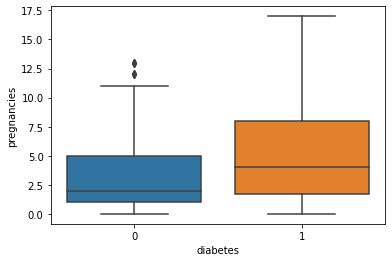

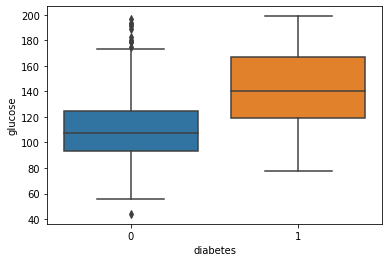

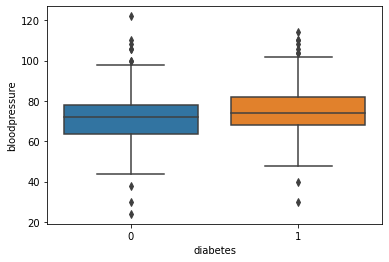

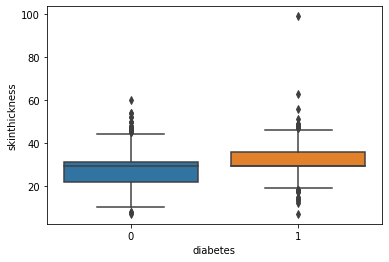

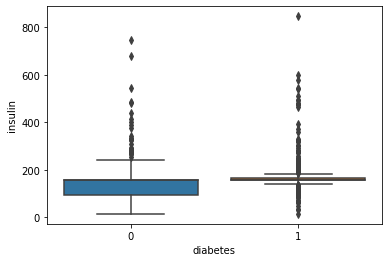

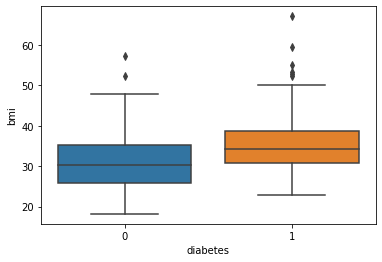

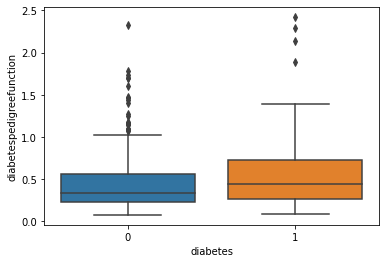

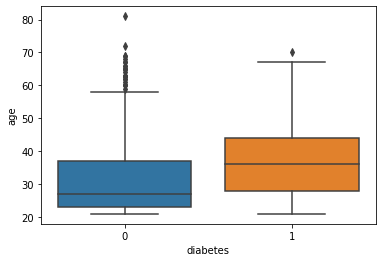

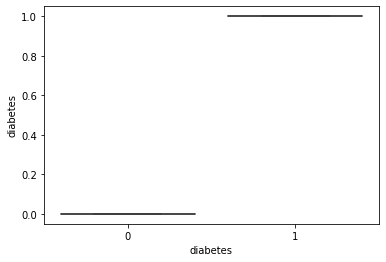

In [7]:
for i in df.columns:
    plt.figure()
    sns.boxplot(data=df, x='diabetes', y=i) #Looks like the boxplots indicated some outliers. Perhaps one could consider a replacement strategy, 
    #but for now I'll keep things simple and keep them.

<AxesSubplot:>

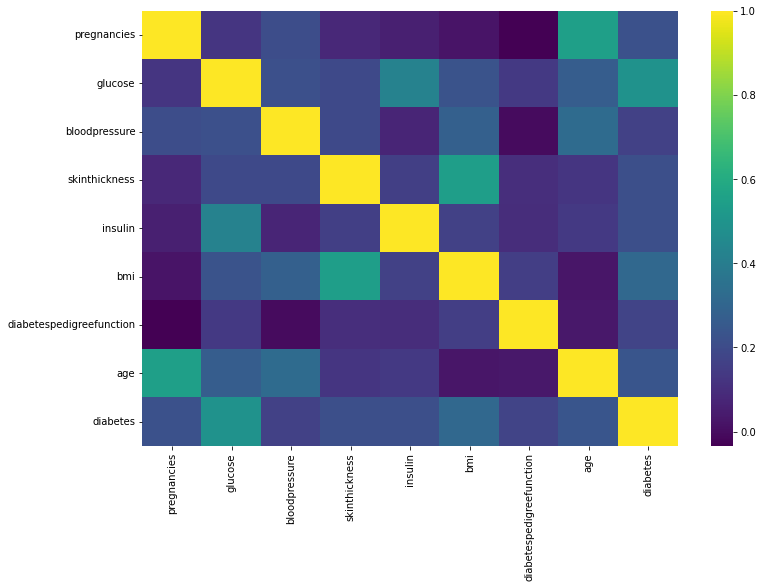

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='viridis') #Some expected correlations are here, such as pregnancies with age, glucose with outcome (having diabetes = 1 in outcome), etc.

In [9]:
pd.pivot_table(df, index=['diabetes'],  values = df.columns, aggfunc = np.mean)
# Looks like all of the features are higher for diabetecs, as well as more varied (from the next pivot table)

,age,bloodpressure,bmi,diabetespedigreefunction,glucose,insulin,pregnancies,skinthickness
diabetes,,,,,,,,
0,31.190000,70.935397,30.888434,0.429734,110.710121,142.210761,3.298000,27.768651
1,37.067164,75.147324,35.384757,0.550500,142.165573,180.431548,4.865672,31.736944


In [10]:
pd.pivot_table(df, index=['diabetes'],  values = df.columns, aggfunc = np.std)

,age,bloodpressure,bmi,diabetespedigreefunction,glucose,insulin,pregnancies,skinthickness
diabetes,,,,,,,,
0,11.667655,11.931033,6.504779,0.299085,24.71706,75.463785,3.017185,8.559606
1,10.968254,11.945712,6.595065,0.372354,29.54175,95.747538,3.741239,8.647599


/home/jcummings/.local/lib/python3.6/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


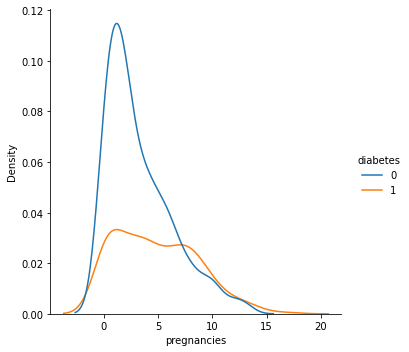

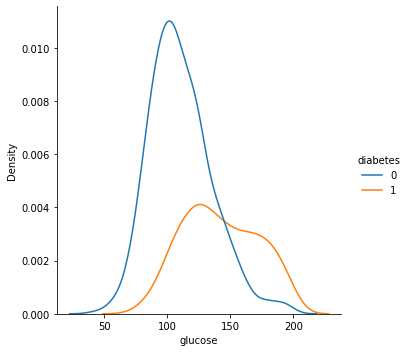

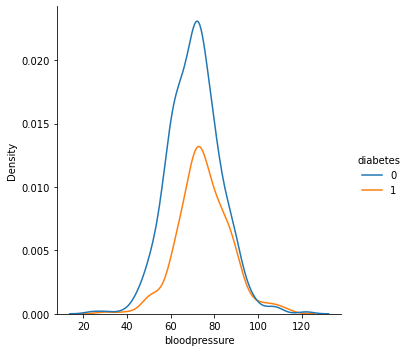

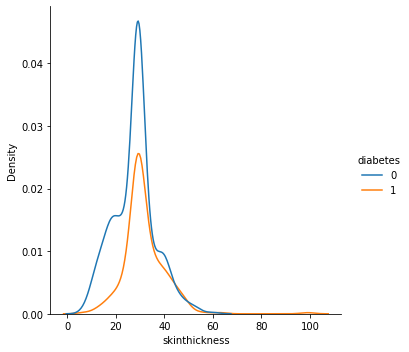

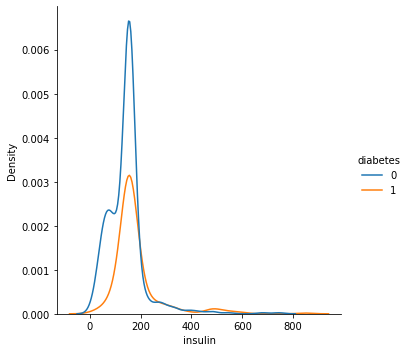

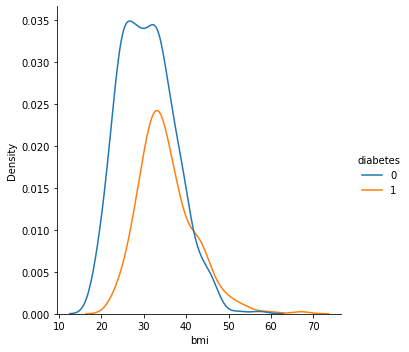

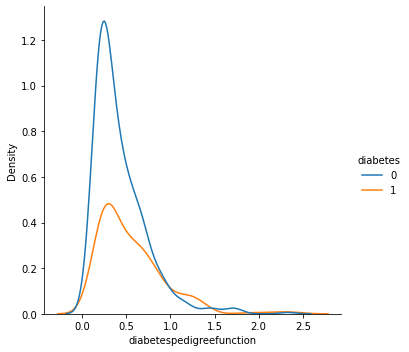

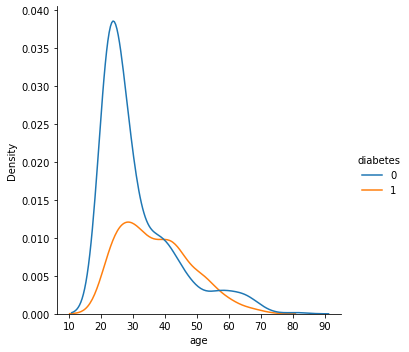

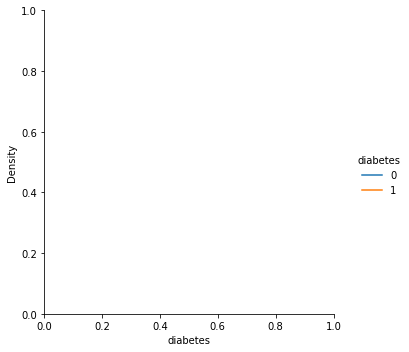

In [11]:
for i in df.columns:
    sns.displot(data=df,x=i,hue='diabetes',kind='kde') 
# It is looking like I'll want to keep all these features, except perhaps skin thickness.
# Data seems generally right-skewed for diabetes (outcome) variable

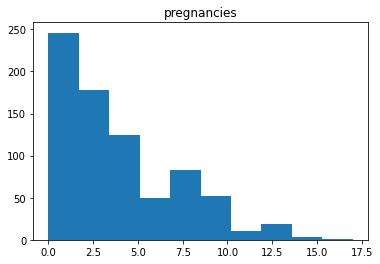

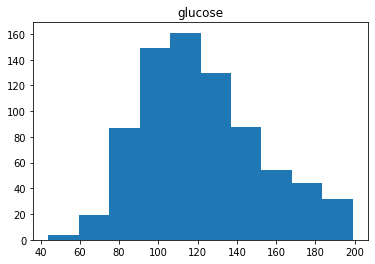

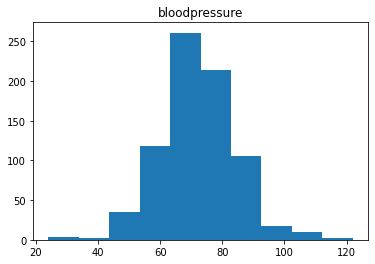

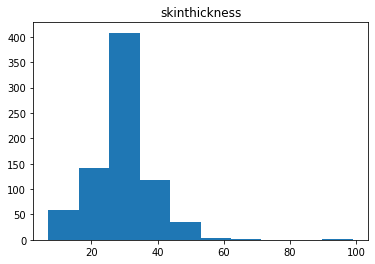

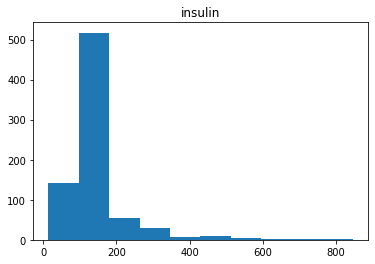

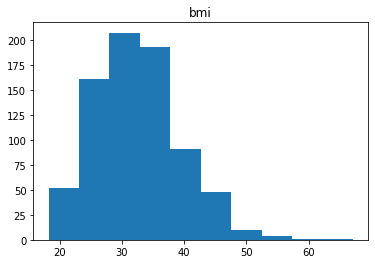

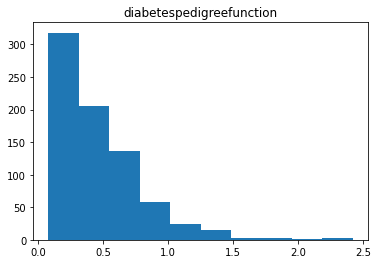

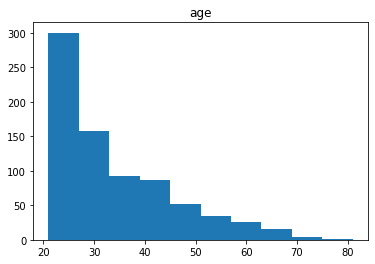

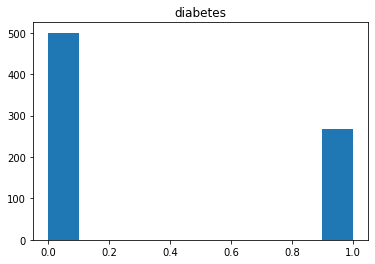

In [12]:
%matplotlib inline
for i in df.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()
# In the plots below we see a lot of the data are normal-looking. The diabetes pedigree fucntions and age could be logged to make them more normal

In [13]:
# Based on the plots below of features and age/bmi, it seems like some features (bmi, glucose, bloodpressure) 
# are more important for older people. I could try one-hot encoding age to try and capture this behavior.

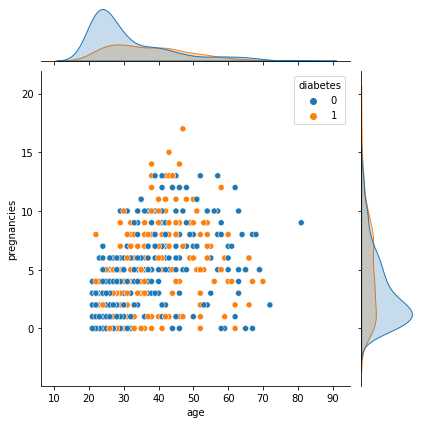

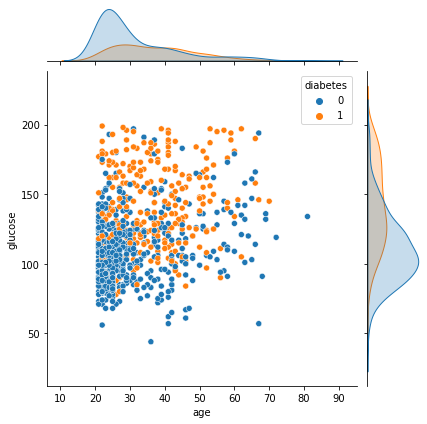

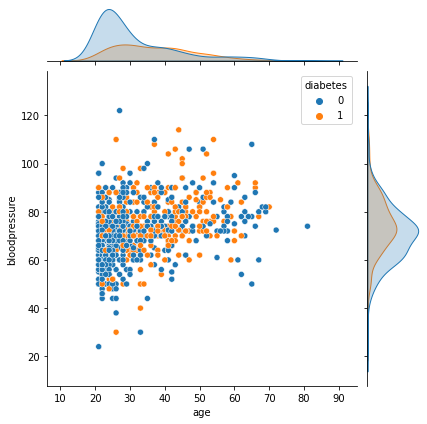

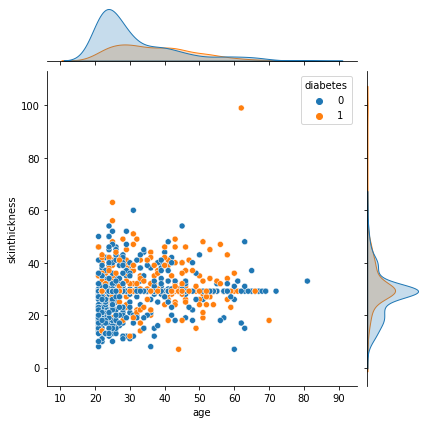

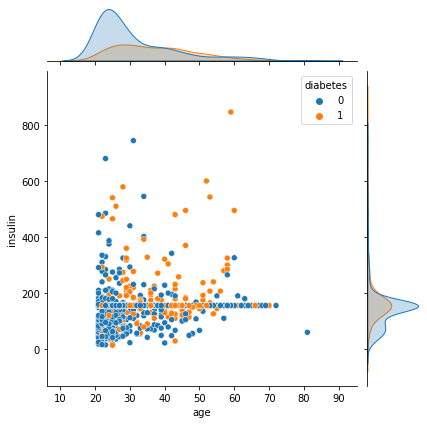

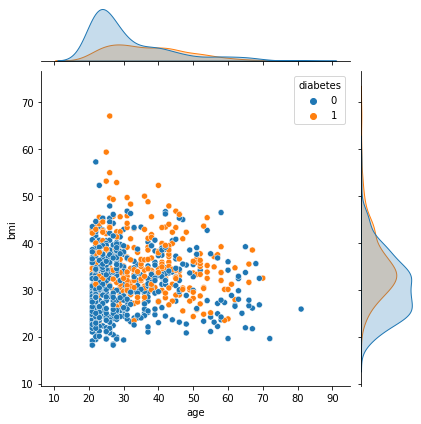

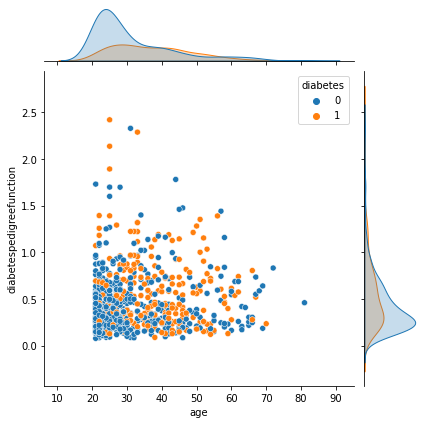

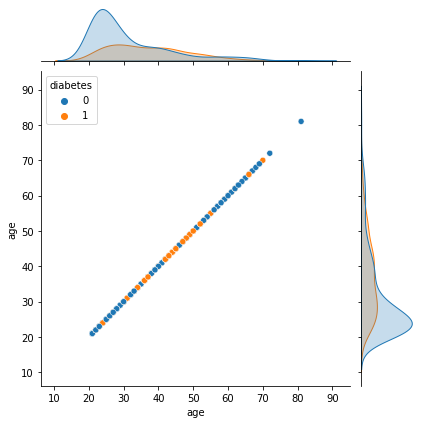

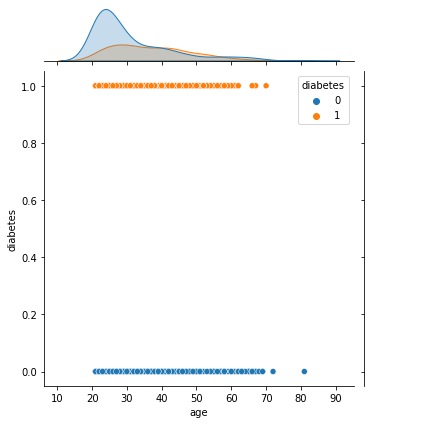

In [14]:
for i in df.columns:
    sns.jointplot(data = df, x = 'age', y = i, hue='diabetes')

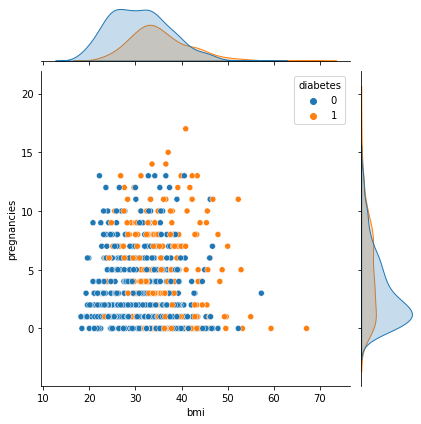

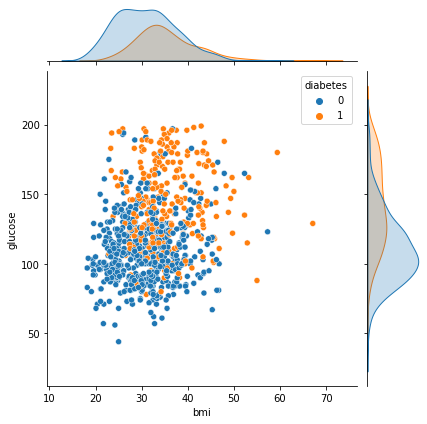

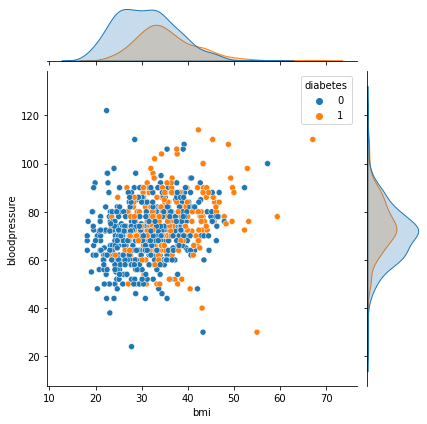

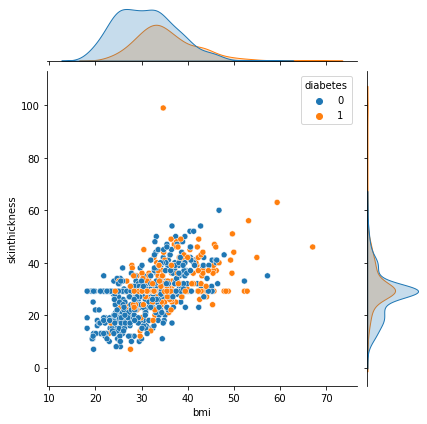

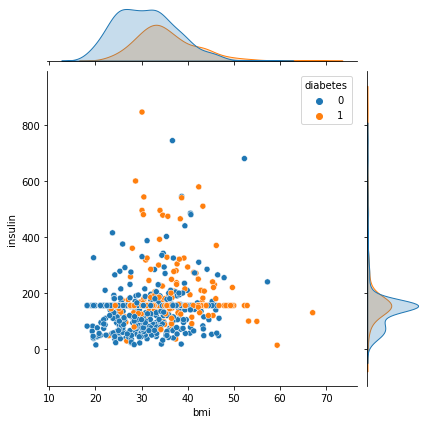

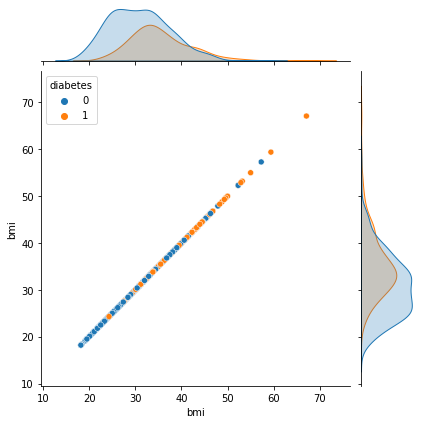

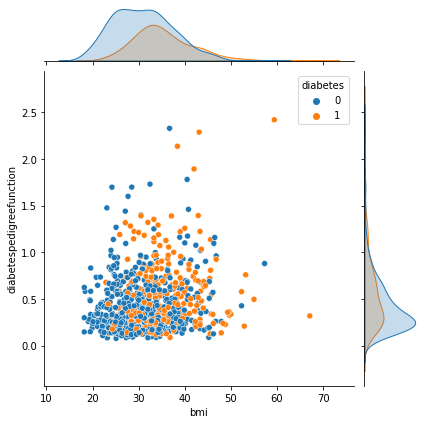

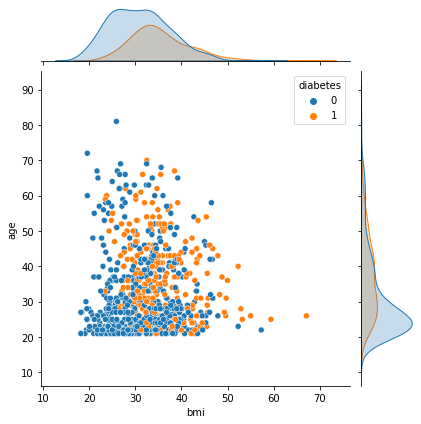

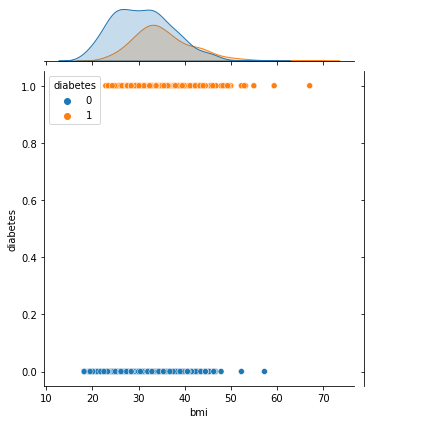

In [15]:
# Based on the plots below of features and age/bmi, it seems like some features (bmi, glucose, bloodpressure) 
# are more important for higher bmi people as well. I could try one-hot encoding age to try and capture this behavior.
for i in df.columns:
    sns.jointplot(data = df, x = 'bmi', y = i, hue='diabetes')

# 2. Model Building Idea, Functions for Model Building, Functions for Visualization
My goal is to create a model with 80% recall on identifying Diabetes. I'll be hyperparameter tuning
with gridsearchcv. Normally models will then predict 1 if P(diab>.5),  0 if P(diab<.5). Instead of 
using .5, I'll search for the maximum threshold thresh such that P(diab>thresh) yields a recall of 80%.

This section starts out with some functions. summary_of_model provides information on the tuned model
including confusion matricies and precision-recall curves.

## Parameters and useful functions for analysis

In [16]:
def summary_of_model(clf, X_train, X_test, y_train, y_test, threshold):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import accuracy_score, precision_score, recall_score
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)
    # This provides a summary of the model given a certain decision threshold of the predicted probability.
    # It includes a summary on recall/accuracy on the training and test sets, a visual display of the confusion matrix
    # and a plot of the precision-recall curve for a given classifier.
    pred_proba_test = clf.predict_proba(X_test)
    pred_test = (pred_proba_test [:,1] >= threshold).astype('int')
    pred_proba_train = clf.predict_proba(X_train)
    pred_train = (pred_proba_train [:,1] >= threshold).astype('int')
    print(classification_report(y_test, pred_test))
    print('Recall of diabetes on the training set: {:.2f}'.format(recall_score(y_train, pred_train)))
    print('Accuracy on the training set: {:.2f}'.format(accuracy_score(y_train, pred_train)))
    print('Recall of diabetes class on the test set: {:.2f}'.format(recall_score(y_test, pred_test)))
    print('Accuracy on the test set: {:.2f}'.format(accuracy_score(y_test, pred_test)))
    print(confusion_matrix(y_test, pred_test))
    # Make a more legible confusion matrix
    _, ax = plt.subplots(figsize=(9,9))
    ax = sns.heatmap(confusion_matrix(y_test, pred_test), annot=True, fmt='d', cmap='vlag', annot_kws={"size": 40, "weight": "bold"})  
    labels = ['False', 'True']
    ax.set_xticklabels(labels, fontsize=25);
    ax.set_yticklabels(labels, fontsize=25);
    ax.set_ylabel('Actual', fontsize=30);
    ax.set_xlabel('Prediction', fontsize=30)
    lr_probs = clf.predict_proba(X_test)
    lr_probs = lr_probs[:, 1]
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
    plt.figure()
    plt.plot(lr_recall, lr_precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

In [17]:
def summary_of_model_nothresh(clf, X_train, X_test, y_train, y_test):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import accuracy_score, precision_score, recall_score
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)
    # This provides a summary of the model, but without the threshold condition.
    # It includes a summary on recall/accuracy on the training and test sets, a visual display of the confusion matrix
    # and a plot of the precision-recall curve for a given classifier.
    pred_test = clf.predict(X_test)
    pred_train = clf.predict(X_train)
    print(classification_report(y_test, pred_test))
    print('Recall of diabetes on the training set: {:.2f}'.format(recall_score(y_train, pred_train)))
    print('Accuracy on the training set: {:.2f}'.format(accuracy_score(y_train, pred_train)))
    print('Recall of diabetes class on the test set: {:.2f}'.format(recall_score(y_test, pred_test)))
    print('Accuracy on the test set: {:.2f}'.format(accuracy_score(y_test, pred_test)))
    print(confusion_matrix(y_test, pred_test))
    _, ax = plt.subplots(figsize=(9,9))
    ax = sns.heatmap(confusion_matrix(y_test, pred_test), annot=True, fmt='d', cmap='vlag', annot_kws={"size": 40, "weight": "bold"})  
    labels = ['False', 'True']
    ax.set_xticklabels(labels, fontsize=25);
    ax.set_yticklabels(labels, fontsize=25);
    ax.set_ylabel('Actual', fontsize=30);
    ax.set_xlabel('Prediction', fontsize=30)
    lr_probs = clf.predict_proba(X_test)
    lr_probs = lr_probs[:, 1]
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
    plt.figure()
    plt.plot(lr_recall, lr_precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

In [18]:
from sklearn.metrics import make_scorer
def recall_calc(y_true, y_pred):
    # A calculator for the recall of diabetes. There is a built-in function for this, but I wanted to verify the built-in.
    y_true = y_true.values
    #y_pred = y_pred.values
    true_positives = np.array([1 if (y_true[i]==1 and y_pred[i]==1) else 0 for i in np.arange(0,len(y_true))])
    false_negatives = np.array([1 if (y_true[i]==1 and y_pred[i]==0) else 0 for i in np.arange(0,len(y_true))])
    recall = true_positives.sum()/(true_positives.sum() + false_negatives.sum())
    return recall

In [19]:
def find_threshold(clf, y_test, X_test):
    # A function that finds the highest (up to descritization) probability threshold (or decision boundary) that has a recall 
    # of req_recall. 
    req_recall = .8
    threshold = .5
    pred_proba_test = clf.predict_proba(X_test)
    pred_test = (pred_proba_test [:,1] >= threshold).astype('int')
    search_step = 1e-2 # the amount to decrease the probabilty threshold if the recall is not > .8
    current_recall = recall_calc(y_test, pred_test)
    while(current_recall < req_recall):
        threshold = threshold - search_step
        pred_proba_test = clf.predict_proba(X_test)
        pred_test = (pred_proba_test [:,1] >= threshold).astype('int')
        current_recall = recall_calc(y_test, pred_test)
    return threshold

# 3. Feature and Model Experimentation

1. I scale all numerical data and run several classifiers. 
The following Models are conidered

* Dummy classifier, for comparison.
* Gradient Boosting Classifier
* Logistic Regression
* Support Vector Machine
* Random Forest
* K Nearest Neighbors
* Decision Tree Classifier

2. I one-hot encode on age and run a Gradient Boosted Classifier and Logistic Regression.
3. I one-hot encode on age and BMI with a Gradient Boosted Classifier and Logistic Regression.
4. I one-hot encode on BMI and test Gradient Boosted Classifiers and Logistic Regression.
5. I combine all steps into a pipeline solution using Gradient Boosted Classifiers.

## Feature Setup, Scale Data

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler #scaling the parameters
ss = StandardScaler()
cols_to_scale = ['pregnancies', 'age', 'bmi', 'diabetespedigreefunction', 'bloodpressure', 'insulin', 'glucose']# cols not included: 'age', 'pregnancies', 'glucose', 'bloodpressure', 'insulin', 'bmi', 'diabetespedigreefunction',  'bloodpressure','skinthickness'
cols_not_scaled = ['diabetes']
#pd.pivot_table(df, index=['outcome'],  values = df.columns, aggfunc = np.mean)
df_scaled = pd.DataFrame(ss.fit_transform(df[cols_to_scale]), index=df.index, columns=cols_to_scale)
df_scaled[cols_not_scaled] = df[cols_not_scaled]
pd.pivot_table(df_scaled, index=['diabetes'],  values = df_scaled.columns, aggfunc = np.mean)

,age,bloodpressure,bmi,diabetespedigreefunction,glucose,insulin,pregnancies
diabetes,,,,,,,
0,-0.174505,-0.121586,-0.228366,-0.127275,-0.360882,-0.156975,-0.162456
1,0.325569,0.226839,0.426056,0.237453,0.673288,0.292863,0.303090


In [21]:
from random import randrange
from sklearn.model_selection import train_test_split
TEST_FRACTION = .25 #percentage of the test size
CV = 7 #cross validations to do in grid search
OPT_ON = 'f1' #what to optimize in gridsearches
N_JOBS = 5 #number of cores
RAND_STATE = 0 #will be doing multiple train-test-splits, and want to keep everything random, but do the same train-test-splits

In [22]:
y=df_scaled.pop('diabetes')
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=TEST_FRACTION, random_state = RAND_STATE)

## Tests Using All Variables as Numerical

### Dummy Classifier

In [23]:
#Let's get a dummy classifier to test our results against first.
import numpy as np
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='stratified')

              precision    recall  f1-score   support

           0       0.68      0.57      0.62       130
           1       0.33      0.44      0.37        62

    accuracy                           0.53       192
   macro avg       0.50      0.50      0.50       192
weighted avg       0.56      0.53      0.54       192

Recall of diabetes on the training set: 0.36
Accuracy on the training set: 0.55
Recall of diabetes class on the test set: 0.44
Accuracy on the test set: 0.53
[[74 56]
 [35 27]]


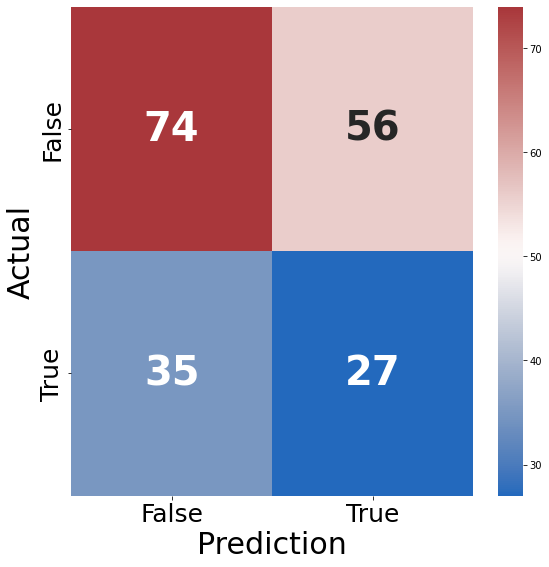

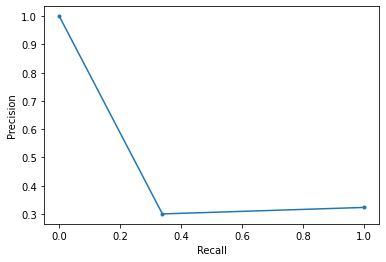

In [24]:
summary_of_model(dummy_clf, X_train, X_test, y_train, y_test, .5)

### Gradient Boosted Classifier

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
>>> from sklearn.model_selection import GridSearchCV
grid_values_boost = {'n_estimators': [100, 200, 300, 400, 500],
                     'learning_rate': [1e-3, 2e-3, 3e-3, 4e-3, 5e-3], 
                     'max_depth': [2, 3]}
clf_boost = GradientBoostingClassifier(random_state = RAND_STATE)
grid_clf_boost = GridSearchCV(clf_boost, param_grid=grid_values_boost, cv=CV, scoring=OPT_ON, n_jobs=N_JOBS, verbose=2)
grid_clf_boost.fit(X_train, y_train)

Fitting 7 folds for each of 50 candidates, totalling 350 fits


GridSearchCV(cv=7, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=5,
             param_grid={'learning_rate': [0.001, 0.002, 0.003, 0.004, 0.005],
                         'max_depth': [2, 3],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='f1', verbose=2)

In [26]:
print('Best Params: {}, \n Best score: {}'.format(grid_clf_boost.best_params_, grid_clf_boost.best_score_))

Best Params: {'learning_rate': 0.005, 'max_depth': 2, 'n_estimators': 500}, 
 Best score: 0.6185201065325289


In [27]:
thresh = find_threshold(grid_clf_boost, y_train, X_train)
print(thresh)

0.3799999999999999


              precision    recall  f1-score   support

           0       0.87      0.84      0.85       130
           1       0.69      0.74      0.71        62

    accuracy                           0.81       192
   macro avg       0.78      0.79      0.78       192
weighted avg       0.81      0.81      0.81       192

Recall of diabetes on the training set: 0.81
Accuracy on the training set: 0.80
Recall of diabetes class on the test set: 0.74
Accuracy on the test set: 0.81
[[109  21]
 [ 16  46]]


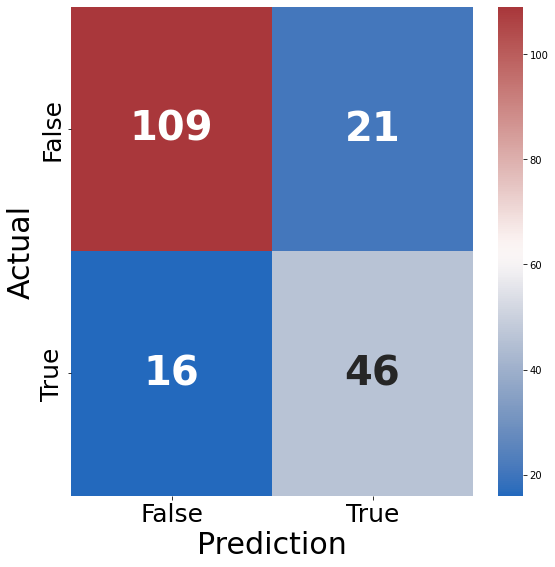

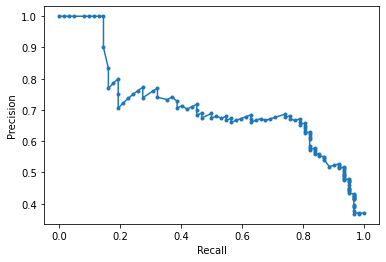

In [28]:
summary_of_model(grid_clf_boost, X_train, X_test, y_train, y_test, thresh)

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       130
           1       0.69      0.47      0.56        62

    accuracy                           0.76       192
   macro avg       0.74      0.68      0.70       192
weighted avg       0.75      0.76      0.75       192

Recall of diabetes on the training set: 0.59
Accuracy on the training set: 0.80
Recall of diabetes class on the test set: 0.47
Accuracy on the test set: 0.76
[[117  13]
 [ 33  29]]


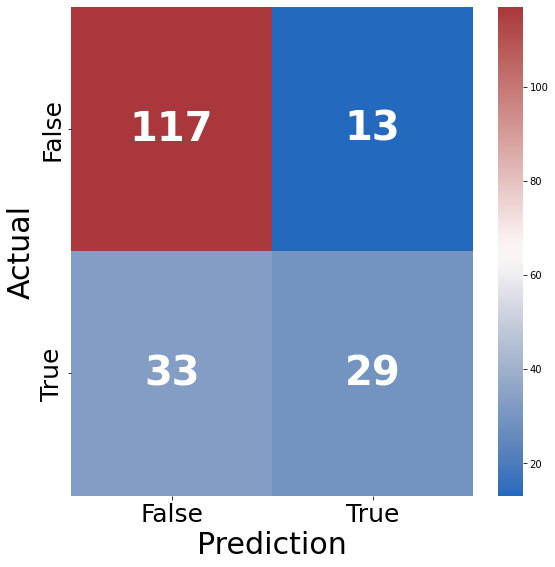

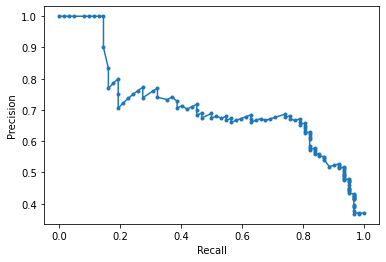

In [29]:
summary_of_model_nothresh(grid_clf_boost, X_train, X_test, y_train, y_test)

### Logistic Regression Classifier

In [30]:
from sklearn.linear_model import LogisticRegression
grid_values_log = {'penalty': ['l1','l2'], 'C': np.logspace(-1, 4, 200), 'solver': ['liblinear']}
clf_log = LogisticRegression(random_state = RAND_STATE)
grid_clf_log = GridSearchCV(clf_log, param_grid=grid_values_log, cv=CV, scoring=OPT_ON, n_jobs=N_JOBS, verbose=2)
grid_clf_log.fit(X_train, y_train)

Fitting 7 folds for each of 400 candidates, totalling 2800 fits


GridSearchCV(cv=7, estimator=LogisticRegression(random_state=0), n_jobs=5,
             param_grid={'C': array([1.00000000e-01, 1.05956018e-01, 1.12266777e-01, 1.18953407e-01,
       1.26038293e-01, 1.33545156e-01, 1.41499130e-01, 1.49926843e-01,
       1.58856513e-01, 1.68318035e-01, 1.78343088e-01, 1.88965234e-01,
       2.00220037e-01, 2.12145178e-01, 2.24780583e-01, 2.38168555e-01,
       2.52353917e-01,...
       3.33129479e+03, 3.52970730e+03, 3.73993730e+03, 3.96268864e+03,
       4.19870708e+03, 4.44878283e+03, 4.71375313e+03, 4.99450512e+03,
       5.29197874e+03, 5.60716994e+03, 5.94113398e+03, 6.29498899e+03,
       6.66991966e+03, 7.06718127e+03, 7.48810386e+03, 7.93409667e+03,
       8.40665289e+03, 8.90735464e+03, 9.43787828e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='f1', verbose=2)

In [31]:
print('Best Params: {}, \n Best score: {:.2f}'.format(grid_clf_log.best_params_, grid_clf_log.best_score_))

Best Params: {'C': 0.40088063288984654, 'penalty': 'l1', 'solver': 'liblinear'}, 
 Best score: 0.64


In [32]:
thresh = find_threshold(grid_clf_log, y_train, X_train)
print(thresh)

0.2999999999999998


              precision    recall  f1-score   support

           0       0.90      0.72      0.80       130
           1       0.59      0.84      0.69        62

    accuracy                           0.76       192
   macro avg       0.75      0.78      0.75       192
weighted avg       0.80      0.76      0.77       192

Recall of diabetes on the training set: 0.81
Accuracy on the training set: 0.73
Recall of diabetes class on the test set: 0.84
Accuracy on the test set: 0.76
[[94 36]
 [10 52]]


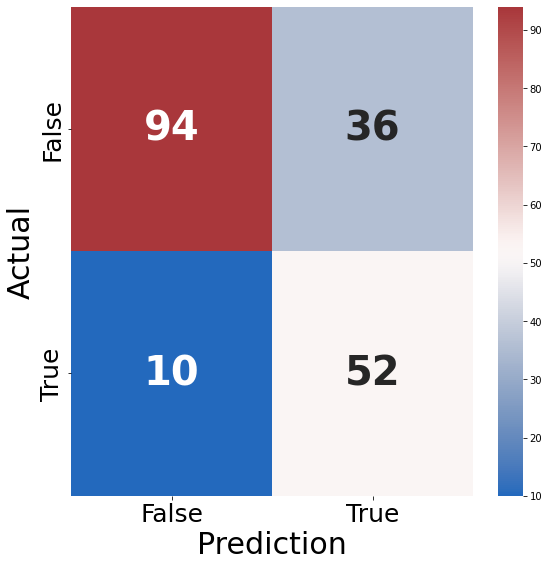

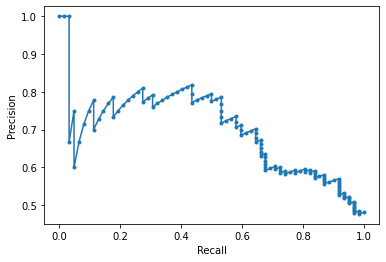

In [33]:
summary_of_model(grid_clf_log, X_train, X_test, y_train, y_test, thresh)

### Support Vector Machine Classifier

In [34]:
from sklearn.svm import SVC
svc_param_grid = {'C': [1, 10],
                  'gamma': [10, 1, 1e-1],
                  'kernel': ['rbf'], 
                  'probability': [True]} # , , 'sigmoid' 
clf_svc = SVC(random_state = RAND_STATE)
grid_clf_svc = GridSearchCV(clf_svc, svc_param_grid, cv=CV, scoring=OPT_ON, n_jobs=N_JOBS, verbose=2)
grid_clf_svc.fit(X_train, y_train)

Fitting 7 folds for each of 6 candidates, totalling 42 fits


GridSearchCV(cv=7, estimator=SVC(random_state=0), n_jobs=5,
             param_grid={'C': [1, 10], 'gamma': [10, 1, 0.1], 'kernel': ['rbf'],
                         'probability': [True]},
             scoring='f1', verbose=2)

In [35]:
print('Best Params: {}, \n Best score: {}'.format(grid_clf_svc.best_params_, grid_clf_svc.best_score_))

Best Params: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}, 
 Best score: 0.6286808713207587


In [36]:
thresh = find_threshold(grid_clf_svc, y_train, X_train)
print(thresh)

0.34999999999999987


              precision    recall  f1-score   support

           0       0.84      0.80      0.82       130
           1       0.62      0.68      0.65        62

    accuracy                           0.76       192
   macro avg       0.73      0.74      0.73       192
weighted avg       0.77      0.76      0.76       192

Recall of diabetes on the training set: 0.81
Accuracy on the training set: 0.85
Recall of diabetes class on the test set: 0.68
Accuracy on the test set: 0.76
[[104  26]
 [ 20  42]]


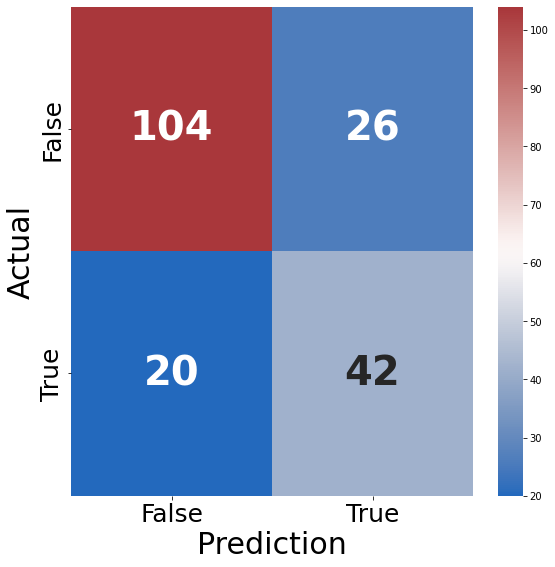

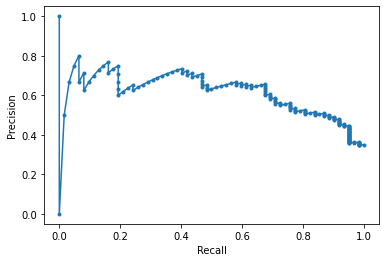

In [37]:
summary_of_model(grid_clf_svc, X_train, X_test, y_train, y_test, thresh)

### Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
forest_param_grid = {'n_estimators': np.arange(50, 100, 200), 
                     'max_depth': [2, 3, 4], 
                     'max_features': ['auto', 'sqrt', 'log2', None]}
clf_forest = RandomForestClassifier(random_state = RAND_STATE)
grid_clf_forest = GridSearchCV(clf_forest, forest_param_grid, cv=CV, scoring=OPT_ON, n_jobs=N_JOBS)
grid_clf_forest.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=RandomForestClassifier(random_state=0), n_jobs=5,
             param_grid={'max_depth': [2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': array([50])},
             scoring='f1')

In [39]:
print('Best Params: {}, \n Best score: {}'.format(grid_clf_forest.best_params_, grid_clf_forest.best_score_))

Best Params: {'max_depth': 4, 'max_features': None, 'n_estimators': 50}, 
 Best score: 0.6376563338354194


In [40]:
thresh = find_threshold(grid_clf_forest, y_train, X_train)
print(thresh)

0.42999999999999994


              precision    recall  f1-score   support

           0       0.85      0.85      0.85       130
           1       0.69      0.69      0.69        62

    accuracy                           0.80       192
   macro avg       0.77      0.77      0.77       192
weighted avg       0.80      0.80      0.80       192

Recall of diabetes on the training set: 0.82
Accuracy on the training set: 0.84
Recall of diabetes class on the test set: 0.69
Accuracy on the test set: 0.80
[[111  19]
 [ 19  43]]


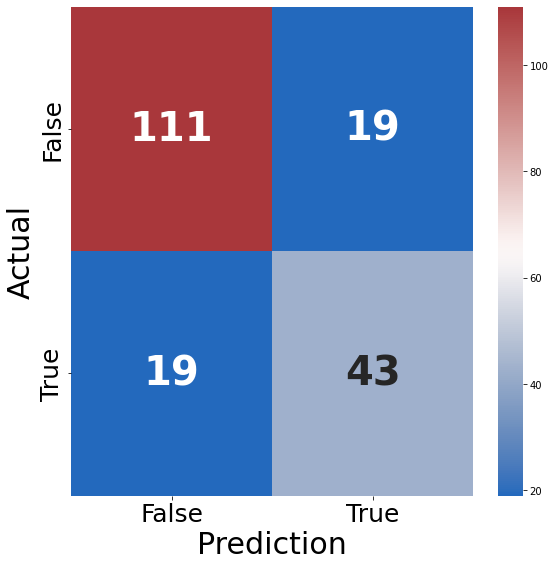

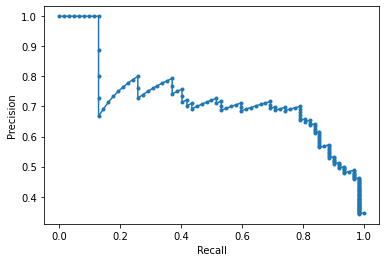

In [41]:
summary_of_model(grid_clf_forest, X_train, X_test, y_train, y_test, thresh)

### KNN Classifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [2, 3, 4]}
grid_clf_knn = GridSearchCV(clf_knn, knn_param_grid, cv=CV, scoring=OPT_ON, n_jobs=N_JOBS,)
grid_clf_knn.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(), n_jobs=5,
             param_grid={'n_neighbors': [2, 3, 4]}, scoring='f1')

In [43]:
print('Best Params: {}, \n Best score: {}'.format(grid_clf_knn.best_params_, grid_clf_knn.best_score_))

Best Params: {'n_neighbors': 3}, 
 Best score: 0.5944148646064725


In [44]:
thresh = find_threshold(grid_clf_knn, y_train, X_train)
print(thresh)

0.32999999999999985


              precision    recall  f1-score   support

           0       0.90      0.59      0.71       130
           1       0.50      0.85      0.63        62

    accuracy                           0.68       192
   macro avg       0.70      0.72      0.67       192
weighted avg       0.77      0.68      0.69       192

Recall of diabetes on the training set: 1.00
Accuracy on the training set: 0.75
Recall of diabetes class on the test set: 0.85
Accuracy on the test set: 0.68
[[77 53]
 [ 9 53]]


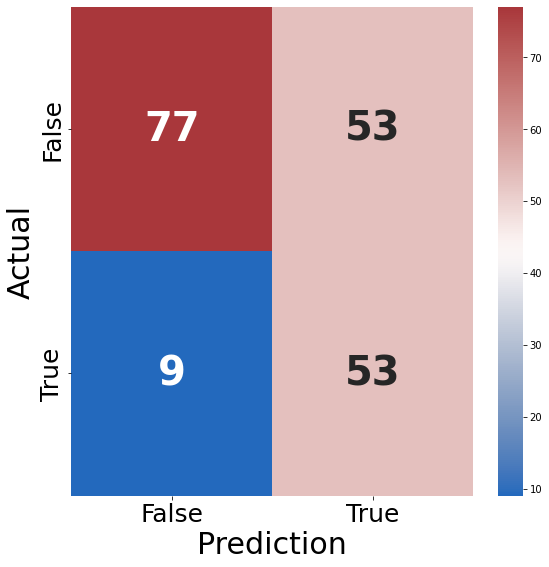

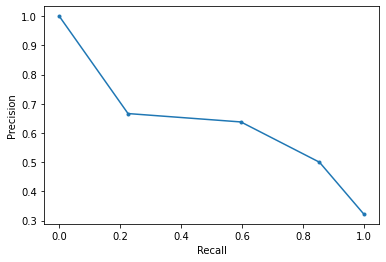

In [45]:
summary_of_model(grid_clf_knn, X_train, X_test, y_train, y_test, thresh)

### Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(random_state = RAND_STATE)
tree_param_grid = {'max_depth': np.arange(1, 4), 'max_features': ['auto', 'sqrt', 'log2'] }
grid_clf_tree = GridSearchCV(clf_tree, tree_param_grid, cv=CV, scoring=OPT_ON, n_jobs=N_JOBS)
grid_clf_tree.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(random_state=0), n_jobs=5,
             param_grid={'max_depth': array([1, 2, 3]),
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='f1')

In [47]:
print('Best Params: {}, \n Best score: {}'.format(grid_clf_tree.best_params_, grid_clf_tree.best_score_))

Best Params: {'max_depth': 1, 'max_features': 'auto'}, 
 Best score: 0.5333263732512794


In [48]:
thresh = find_threshold(grid_clf_tree, y_train, X_train)
print(thresh)

0.23999999999999977


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       130
           1       0.32      1.00      0.49        62

    accuracy                           0.32       192
   macro avg       0.16      0.50      0.24       192
weighted avg       0.10      0.32      0.16       192

Recall of diabetes on the training set: 1.00
Accuracy on the training set: 0.36
Recall of diabetes class on the test set: 1.00
Accuracy on the test set: 0.32
[[  0 130]
 [  0  62]]


/home/jcummings/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jcummings/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jcummings/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


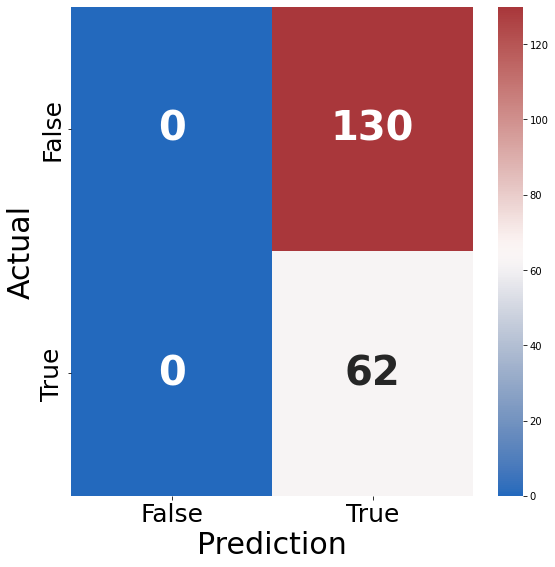

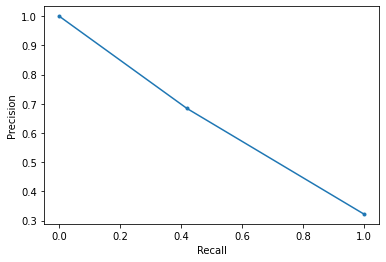

In [49]:
summary_of_model(grid_clf_tree, X_train, X_test, y_train, y_test, thresh) #my stragety of finding a minimum threshold for 80% recall is clearly not working for the KNN

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       130
           1       0.68      0.42      0.52        62

    accuracy                           0.75       192
   macro avg       0.73      0.66      0.68       192
weighted avg       0.74      0.75      0.73       192

Recall of diabetes on the training set: 0.47
Accuracy on the training set: 0.75
Recall of diabetes class on the test set: 0.42
Accuracy on the test set: 0.75
[[118  12]
 [ 36  26]]


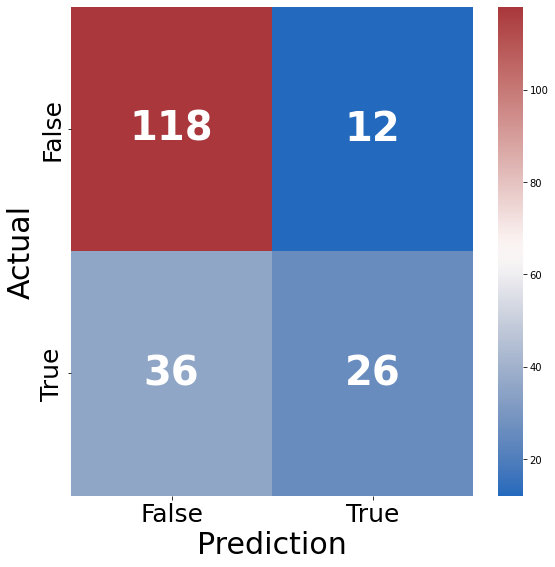

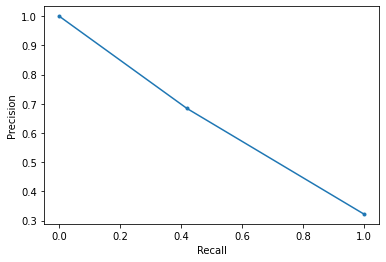

In [50]:
summary_of_model_nothresh(grid_clf_tree, X_train, X_test, y_train, y_test)

## Tests One-hot encoding on the age

### Feature Setup, Scale Data, One-Hot Encode the Age

In [51]:
df_cat = df
df['age_cat'] = pd.cut(df['age'], bins=[0, 25, 35, 45, 60, float('Inf')], labels=['very young', 'young', 'mid_young', 'mid', 'old'])
df_bmi_cat = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, float('Inf')], labels=['healthy', 'overweight', 'obese', 'very_obese'])
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,diabetes,age_cat
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,mid
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,young
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,young
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,very young
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,young


In [52]:
cols_num = ['pregnancies', 'glucose', 'bloodpressure', 'insulin', 'bmi', 'diabetespedigreefunction'] #not including skin thickness, age (since age now categorical)
df_num = df[cols_num]
cols_cat = ['age_cat', 'diabetes']
df_cat = df[cols_cat]

In [53]:
ss = StandardScaler()
df_num_scaled = pd.DataFrame(ss.fit_transform(df_num), index=df_num.index, columns=df_num.columns)
df_num_scaled.head()

,pregnancies,glucose,bloodpressure,insulin,bmi,diabetespedigreefunction
0,0.639947,0.865108,-0.033518,-3.345079e-16,0.166292,0.468492
1,-0.844885,-1.206162,-0.529859,-3.345079e-16,-0.852531,-0.365061
2,1.233880,2.015813,-0.695306,-3.345079e-16,-1.332833,0.604397
3,-0.844885,-1.074652,-0.529859,-7.243887e-01,-0.634212,-0.920763
4,-1.141852,0.503458,-2.680669,1.465506e-01,1.548980,5.484909


In [54]:
ycat1 = df_cat.pop('diabetes')

In [55]:
df_cat.head()

,age_cat
0,mid
1,young
2,young
3,very young
4,young


In [56]:
df_cat_encoded = pd.get_dummies(df_cat)
df_cat_encoded.head()

,age_cat_very young,age_cat_young,age_cat_mid_young,age_cat_mid,age_cat_old
0,0,0,0,1,0
1,0,1,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [57]:
df_rejoined = pd.concat([df_num_scaled, df_cat_encoded], axis=1)
df_rejoined.head()

,pregnancies,glucose,bloodpressure,insulin,bmi,diabetespedigreefunction,age_cat_very young,age_cat_young,age_cat_mid_young,age_cat_mid,age_cat_old
0,0.639947,0.865108,-0.033518,-3.345079e-16,0.166292,0.468492,0,0,0,1,0
1,-0.844885,-1.206162,-0.529859,-3.345079e-16,-0.852531,-0.365061,0,1,0,0,0
2,1.233880,2.015813,-0.695306,-3.345079e-16,-1.332833,0.604397,0,1,0,0,0
3,-0.844885,-1.074652,-0.529859,-7.243887e-01,-0.634212,-0.920763,1,0,0,0,0
4,-1.141852,0.503458,-2.680669,1.465506e-01,1.548980,5.484909,0,1,0,0,0


In [58]:
Xcat1_train, Xcat1_test, ycat1_train, ycat1_test = train_test_split(df_rejoined, ycat1, test_size=TEST_FRACTION, random_state = RAND_STATE)

### Gradient Boosted Classifier, One-hot Encoding on the Age

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
clf_boost_cat1 = GradientBoostingClassifier(random_state = RAND_STATE)
grid_clf_boost_cat1 = GridSearchCV(clf_boost_cat1, param_grid=grid_values_boost, cv=CV, scoring=OPT_ON, n_jobs=N_JOBS, verbose=2)
#note: using the parameters from previous gridsearch on gradient boosting classifier
grid_clf_boost_cat1.fit(Xcat1_train, ycat1_train)

Fitting 7 folds for each of 50 candidates, totalling 350 fits


GridSearchCV(cv=7, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=5,
             param_grid={'learning_rate': [0.001, 0.002, 0.003, 0.004, 0.005],
                         'max_depth': [2, 3],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='f1', verbose=2)

In [60]:
print('Best Params: {}, \n Best score: {}'.format(grid_clf_boost_cat1.best_params_, grid_clf_boost_cat1.best_score_))

Best Params: {'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 500}, 
 Best score: 0.6105285638877384


In [61]:
thresh = find_threshold(grid_clf_boost_cat1, ycat1_train, Xcat1_train)
print(thresh)

0.3999999999999999


              precision    recall  f1-score   support

           0       0.87      0.85      0.86       130
           1       0.70      0.74      0.72        62

    accuracy                           0.81       192
   macro avg       0.78      0.79      0.79       192
weighted avg       0.82      0.81      0.81       192

Recall of diabetes on the training set: 0.80
Accuracy on the training set: 0.83
Recall of diabetes class on the test set: 0.74
Accuracy on the test set: 0.81
[[110  20]
 [ 16  46]]


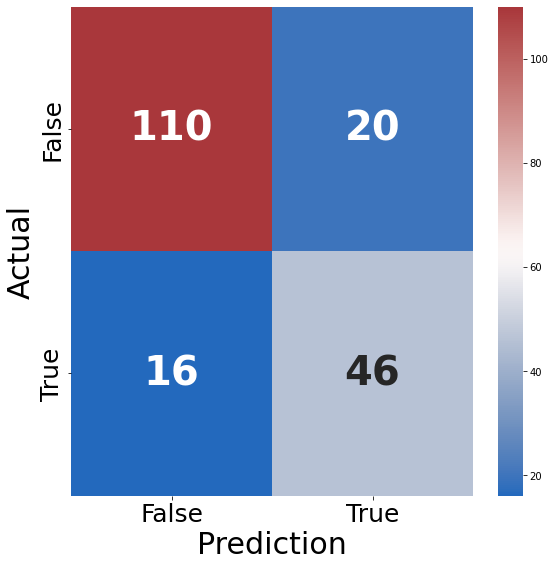

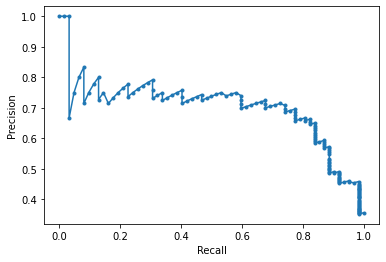

In [62]:
summary_of_model(grid_clf_boost_cat1, Xcat1_train, Xcat1_test, ycat1_train, ycat1_test, thresh) #Summary for lowering the threshold to achieve necessary recall on diabetes

### Logistic Regression, One-hot Encoding on the Age

In [63]:
clf_log_cat1 = LogisticRegression(random_state = RAND_STATE)
grid_clf_log_cat1 = GridSearchCV(clf_log_cat1, param_grid=grid_values_log, cv=CV, scoring=OPT_ON, n_jobs=N_JOBS, verbose=2)
grid_clf_log_cat1.fit(Xcat1_train, ycat1_train)

Fitting 7 folds for each of 400 candidates, totalling 2800 fits


GridSearchCV(cv=7, estimator=LogisticRegression(random_state=0), n_jobs=5,
             param_grid={'C': array([1.00000000e-01, 1.05956018e-01, 1.12266777e-01, 1.18953407e-01,
       1.26038293e-01, 1.33545156e-01, 1.41499130e-01, 1.49926843e-01,
       1.58856513e-01, 1.68318035e-01, 1.78343088e-01, 1.88965234e-01,
       2.00220037e-01, 2.12145178e-01, 2.24780583e-01, 2.38168555e-01,
       2.52353917e-01,...
       3.33129479e+03, 3.52970730e+03, 3.73993730e+03, 3.96268864e+03,
       4.19870708e+03, 4.44878283e+03, 4.71375313e+03, 4.99450512e+03,
       5.29197874e+03, 5.60716994e+03, 5.94113398e+03, 6.29498899e+03,
       6.66991966e+03, 7.06718127e+03, 7.48810386e+03, 7.93409667e+03,
       8.40665289e+03, 8.90735464e+03, 9.43787828e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='f1', verbose=2)

In [64]:
print('Best Params: {}, \n Best score: {}'.format(grid_clf_log_cat1.best_params_, grid_clf_log_cat1.best_score_))

Best Params: {'C': 3.036771118035459, 'penalty': 'l1', 'solver': 'liblinear'}, 
 Best score: 0.6523338424525109


In [65]:
thresh = find_threshold(grid_clf_log_cat1, ycat1_train, Xcat1_train)
print(thresh)

0.30999999999999983


              precision    recall  f1-score   support

           0       0.89      0.77      0.83       130
           1       0.62      0.81      0.70        62

    accuracy                           0.78       192
   macro avg       0.76      0.79      0.77       192
weighted avg       0.81      0.78      0.79       192

Recall of diabetes on the training set: 0.81
Accuracy on the training set: 0.75
Recall of diabetes class on the test set: 0.81
Accuracy on the test set: 0.78
[[100  30]
 [ 12  50]]


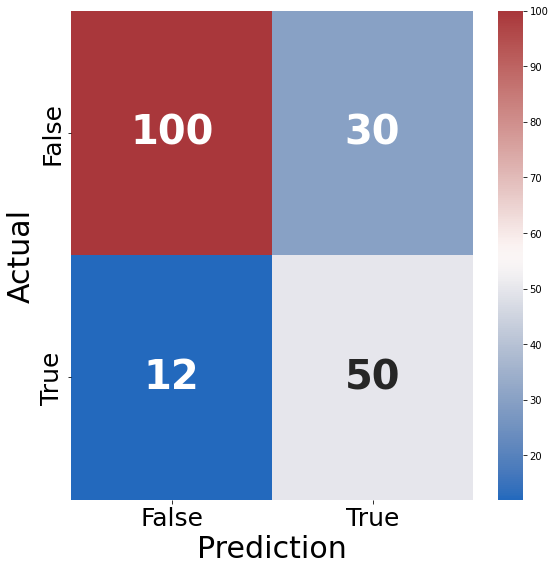

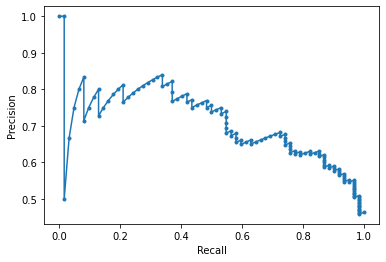

In [66]:
summary_of_model(grid_clf_log_cat1, Xcat1_train, Xcat1_test, ycat1_train, ycat1_test, thresh)

## Tests One-hot encoding on age and BMI

### Feature Setup, Scale Data, One-Hot Encode the Age and BMI

In [67]:
df_cat = df
df['age_cat'] = pd.cut(df['age'], bins=[0, 25, 35, 45, 60, float('Inf')], labels=['very young', 'young', 'mid_young', 'mid', 'old'])
df['bmi_cat'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, float('Inf')], labels=['healthy', 'overweight', 'obese', 'very_obese'])
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,diabetes,age_cat,bmi_cat
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,mid,very_obese
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,young,obese
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,young,overweight
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,very young,obese
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,young,very_obese


In [68]:
cols_num = ['pregnancies', 'glucose', 'bloodpressure', 'insulin', 'diabetespedigreefunction'] #not including skin thickness, age, bmi (since age, bmi now categorical)
df_num = df[cols_num]
cols_cat = ['age_cat', 'bmi_cat', 'diabetes']
df_cat = df[cols_cat]

In [69]:
ss = StandardScaler()
#pd.pivot_table(df, index=['outcome'],  values = df.columns, aggfunc = np.mean)
df_num_scaled = pd.DataFrame(ss.fit_transform(df_num), index=df_num.index, columns=df_num.columns)
df_num_scaled.head()

,pregnancies,glucose,bloodpressure,insulin,diabetespedigreefunction
0,0.639947,0.865108,-0.033518,-3.345079e-16,0.468492
1,-0.844885,-1.206162,-0.529859,-3.345079e-16,-0.365061
2,1.233880,2.015813,-0.695306,-3.345079e-16,0.604397
3,-0.844885,-1.074652,-0.529859,-7.243887e-01,-0.920763
4,-1.141852,0.503458,-2.680669,1.465506e-01,5.484909


In [70]:
ycat2 = df_cat.pop('diabetes')

In [71]:
df_cat_encoded = pd.get_dummies(df_cat)
df_cat_encoded.head()

,age_cat_very young,age_cat_young,age_cat_mid_young,age_cat_mid,age_cat_old,bmi_cat_healthy,bmi_cat_overweight,bmi_cat_obese,bmi_cat_very_obese
0,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,0,0,1,0
2,0,1,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,1


In [72]:
df_rejoined = pd.concat([df_num_scaled, df_cat_encoded], axis=1)
df_rejoined.head()

,pregnancies,glucose,bloodpressure,insulin,diabetespedigreefunction,age_cat_very young,age_cat_young,age_cat_mid_young,age_cat_mid,age_cat_old,bmi_cat_healthy,bmi_cat_overweight,bmi_cat_obese,bmi_cat_very_obese
0,0.639947,0.865108,-0.033518,-3.345079e-16,0.468492,0,0,0,1,0,0,0,0,1
1,-0.844885,-1.206162,-0.529859,-3.345079e-16,-0.365061,0,1,0,0,0,0,0,1,0
2,1.233880,2.015813,-0.695306,-3.345079e-16,0.604397,0,1,0,0,0,0,1,0,0
3,-0.844885,-1.074652,-0.529859,-7.243887e-01,-0.920763,1,0,0,0,0,0,0,1,0
4,-1.141852,0.503458,-2.680669,1.465506e-01,5.484909,0,1,0,0,0,0,0,0,1


In [73]:
Xcat2_train, Xcat2_test, ycat2_train, ycat2_test = train_test_split(df_rejoined, ycat2, test_size=TEST_FRACTION, random_state = RAND_STATE)

### Gradient Boosting Classifier, One-hot Encoding on the Age and BMI

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
clf_log = LogisticRegression(random_state = RAND_STATE)
grid_clf_boost_cat2 = GridSearchCV(clf_boost, param_grid=grid_values_boost, cv=CV, scoring=OPT_ON, n_jobs=N_JOBS, verbose=2)
grid_clf_boost_cat2.fit(Xcat2_train, ycat2_train)

Fitting 7 folds for each of 50 candidates, totalling 350 fits


GridSearchCV(cv=7, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=5,
             param_grid={'learning_rate': [0.001, 0.002, 0.003, 0.004, 0.005],
                         'max_depth': [2, 3],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='f1', verbose=2)

In [75]:
print('Best Params: {}, \n Best score: {}'.format(grid_clf_boost_cat2.best_params_, grid_clf_boost_cat2.best_score_))

Best Params: {'learning_rate': 0.005, 'max_depth': 2, 'n_estimators': 500}, 
 Best score: 0.6113147466814388


In [76]:
thresh = find_threshold(grid_clf_boost_cat2, ycat2_train, Xcat2_train)
print(thresh)

0.33999999999999986


              precision    recall  f1-score   support

           0       0.87      0.80      0.83       130
           1       0.64      0.74      0.69        62

    accuracy                           0.78       192
   macro avg       0.75      0.77      0.76       192
weighted avg       0.79      0.78      0.79       192

Recall of diabetes on the training set: 0.81
Accuracy on the training set: 0.79
Recall of diabetes class on the test set: 0.74
Accuracy on the test set: 0.78
[[104  26]
 [ 16  46]]


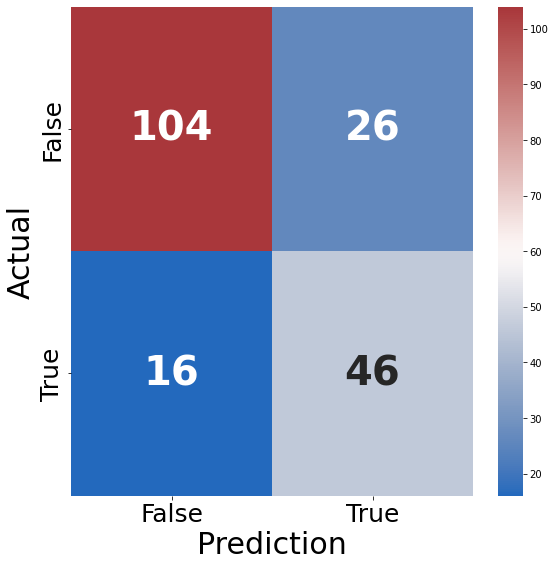

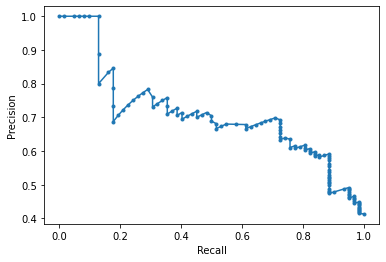

In [77]:
summary_of_model(grid_clf_boost_cat2, Xcat2_train, Xcat2_test, ycat2_train, ycat2_test, thresh) 

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       130
           1       0.71      0.48      0.58        62

    accuracy                           0.77       192
   macro avg       0.75      0.70      0.71       192
weighted avg       0.76      0.77      0.76       192

Recall of diabetes on the training set: 0.57
Accuracy on the training set: 0.80
Recall of diabetes class on the test set: 0.48
Accuracy on the test set: 0.77
[[118  12]
 [ 32  30]]


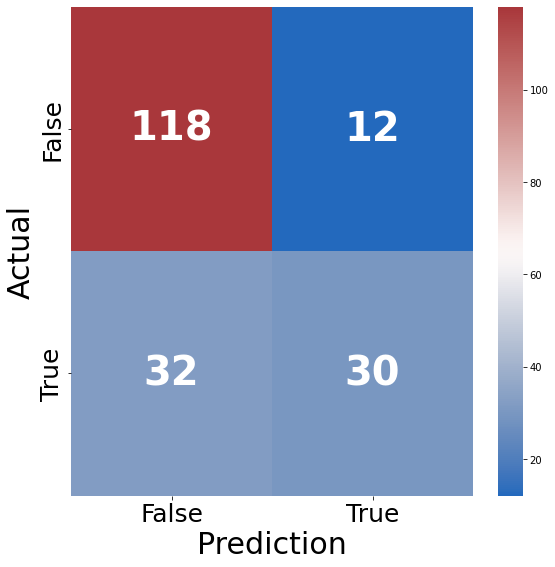

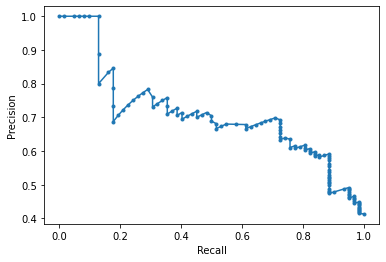

In [78]:
summary_of_model(grid_clf_boost_cat2, Xcat2_train, Xcat2_test, ycat2_train, ycat2_test, .5) #Summary using a threshold of .5

### Logistic Regression, One-hot Encoding on the Age and BMI

In [79]:
clf_log_cat2 = LogisticRegression(random_state = RAND_STATE)
grid_clf_log_cat2 = GridSearchCV(clf_log_cat2, param_grid=grid_values_log, cv=CV, scoring=OPT_ON, n_jobs=N_JOBS, verbose=2)
grid_clf_log_cat2.fit(Xcat2_train, ycat2_train)

Fitting 7 folds for each of 400 candidates, totalling 2800 fits


GridSearchCV(cv=7, estimator=LogisticRegression(random_state=0), n_jobs=5,
             param_grid={'C': array([1.00000000e-01, 1.05956018e-01, 1.12266777e-01, 1.18953407e-01,
       1.26038293e-01, 1.33545156e-01, 1.41499130e-01, 1.49926843e-01,
       1.58856513e-01, 1.68318035e-01, 1.78343088e-01, 1.88965234e-01,
       2.00220037e-01, 2.12145178e-01, 2.24780583e-01, 2.38168555e-01,
       2.52353917e-01,...
       3.33129479e+03, 3.52970730e+03, 3.73993730e+03, 3.96268864e+03,
       4.19870708e+03, 4.44878283e+03, 4.71375313e+03, 4.99450512e+03,
       5.29197874e+03, 5.60716994e+03, 5.94113398e+03, 6.29498899e+03,
       6.66991966e+03, 7.06718127e+03, 7.48810386e+03, 7.93409667e+03,
       8.40665289e+03, 8.90735464e+03, 9.43787828e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='f1', verbose=2)

In [80]:
print('Best Params: {}, \n Best score: {}'.format(grid_clf_log_cat2.best_params_, grid_clf_log_cat2.best_score_))

Best Params: {'C': 1.6070528182616393, 'penalty': 'l2', 'solver': 'liblinear'}, 
 Best score: 0.6513014154841619


In [81]:
thresh = find_threshold(grid_clf_log_cat2, ycat2_train, Xcat2_train)
print(thresh)

0.31999999999999984


              precision    recall  f1-score   support

           0       0.89      0.78      0.83       130
           1       0.64      0.79      0.71        62

    accuracy                           0.79       192
   macro avg       0.76      0.79      0.77       192
weighted avg       0.81      0.79      0.79       192

Recall of diabetes on the training set: 0.80
Accuracy on the training set: 0.73
Recall of diabetes class on the test set: 0.79
Accuracy on the test set: 0.79
[[102  28]
 [ 13  49]]


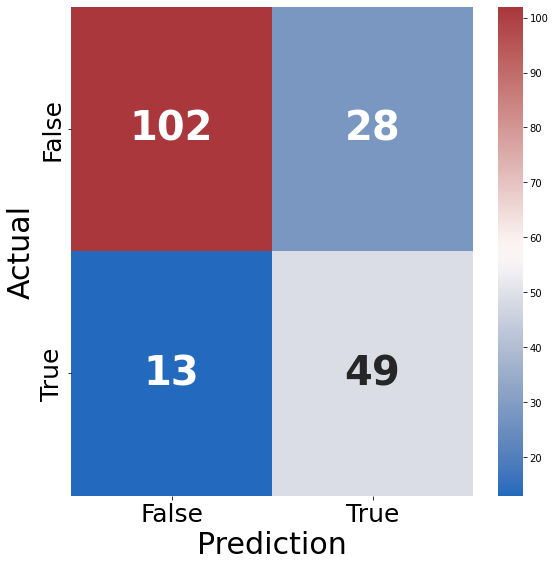

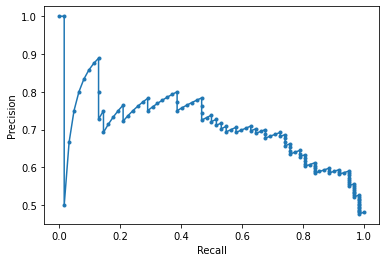

In [82]:
summary_of_model(grid_clf_log_cat2, Xcat2_train, Xcat2_test, ycat2_train, ycat2_test, thresh)

## Tests One-hot encoding on just the BMI

### Feature Setup, Scale Data, One-Hot Encode just the BMI

In [83]:
df_cat = df
df['bmi_cat'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, float('Inf')], labels=['healthy', 'overweight', 'obese', 'very_obese'])
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,diabetes,age_cat,bmi_cat
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,mid,very_obese
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,young,obese
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,young,overweight
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,very young,obese
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,young,very_obese


In [84]:
cols_num = ['pregnancies', 'glucose', 'bloodpressure', 'insulin', 'diabetespedigreefunction', 'age'] #not including skin thickness, bmi (since bmi now categorical)
df_num = df[cols_num]
cols_cat = ['bmi_cat', 'diabetes']
df_cat = df[cols_cat]

In [85]:
ss = StandardScaler()
#pd.pivot_table(df, index=['outcome'],  values = df.columns, aggfunc = np.mean)
df_num_scaled = pd.DataFrame(ss.fit_transform(df_num), index=df_num.index, columns=df_num.columns)
df_num_scaled.head()

,pregnancies,glucose,bloodpressure,insulin,diabetespedigreefunction,age
0,0.639947,0.865108,-0.033518,-3.345079e-16,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-3.345079e-16,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-3.345079e-16,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.243887e-01,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,1.465506e-01,5.484909,-0.020496


In [86]:
ycat3 = df_cat.pop('diabetes')
df_cat_encoded = pd.get_dummies(df_cat)
df_cat_encoded.head()

,bmi_cat_healthy,bmi_cat_overweight,bmi_cat_obese,bmi_cat_very_obese
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,1


In [87]:
df_rejoined = pd.concat([df_num_scaled, df_cat_encoded], axis=1)
df_rejoined.head()

,pregnancies,glucose,bloodpressure,insulin,diabetespedigreefunction,age,bmi_cat_healthy,bmi_cat_overweight,bmi_cat_obese,bmi_cat_very_obese
0,0.639947,0.865108,-0.033518,-3.345079e-16,0.468492,1.425995,0,0,0,1
1,-0.844885,-1.206162,-0.529859,-3.345079e-16,-0.365061,-0.190672,0,0,1,0
2,1.233880,2.015813,-0.695306,-3.345079e-16,0.604397,-0.105584,0,1,0,0
3,-0.844885,-1.074652,-0.529859,-7.243887e-01,-0.920763,-1.041549,0,0,1,0
4,-1.141852,0.503458,-2.680669,1.465506e-01,5.484909,-0.020496,0,0,0,1


In [88]:
Xcat3_train, Xcat3_test, ycat3_train, ycat3_test = train_test_split(df_rejoined, ycat3, test_size=TEST_FRACTION, random_state = RAND_STATE)

### Gradient Boosted Classifier with One-Hot Encoding just on BMI

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
clf_boost_cat3 = GradientBoostingClassifier(random_state = RAND_STATE)
grid_clf_boost_cat3 = GridSearchCV(clf_boost_cat3, param_grid=grid_values_boost, cv=CV, scoring=OPT_ON, n_jobs=N_JOBS, verbose=2)
# note: using previous parameter search parameters
grid_clf_boost_cat3.fit(Xcat3_train, ycat3_train)

Fitting 7 folds for each of 50 candidates, totalling 350 fits


GridSearchCV(cv=7, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=5,
             param_grid={'learning_rate': [0.001, 0.002, 0.003, 0.004, 0.005],
                         'max_depth': [2, 3],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='f1', verbose=2)

In [90]:
print('Best Params: {}, \n Best score: {}'.format(grid_clf_boost_cat3.best_params_, grid_clf_boost_cat3.best_score_))

Best Params: {'learning_rate': 0.005, 'max_depth': 2, 'n_estimators': 500}, 
 Best score: 0.6249310856646264


In [91]:
thresh = find_threshold(grid_clf_boost_cat3, ycat3_train, Xcat3_train)
print(thresh)

0.3699999999999999


              precision    recall  f1-score   support

           0       0.84      0.84      0.84       130
           1       0.67      0.68      0.67        62

    accuracy                           0.79       192
   macro avg       0.76      0.76      0.76       192
weighted avg       0.79      0.79      0.79       192

Recall of diabetes on the training set: 0.80
Accuracy on the training set: 0.80
Recall of diabetes class on the test set: 0.68
Accuracy on the test set: 0.79
[[109  21]
 [ 20  42]]


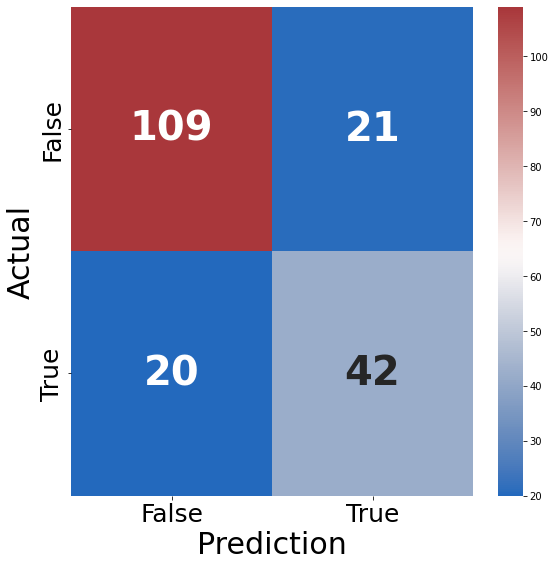

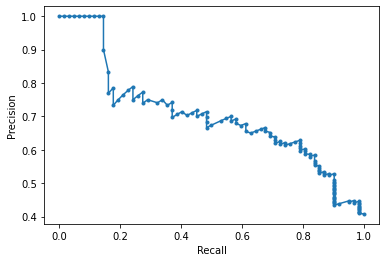

In [92]:
summary_of_model(grid_clf_boost_cat3, Xcat3_train, Xcat3_test, ycat3_train, ycat3_test, thresh)

In [93]:
clf_log_cat3 = LogisticRegression(random_state = RAND_STATE)
grid_clf_log_cat3 = GridSearchCV(clf_log_cat3, param_grid=grid_values_log, cv=CV, scoring=OPT_ON, n_jobs=N_JOBS, verbose=2)
grid_clf_log_cat3.fit(Xcat3_train, ycat3_train)

Fitting 7 folds for each of 400 candidates, totalling 2800 fits


GridSearchCV(cv=7, estimator=LogisticRegression(random_state=0), n_jobs=5,
             param_grid={'C': array([1.00000000e-01, 1.05956018e-01, 1.12266777e-01, 1.18953407e-01,
       1.26038293e-01, 1.33545156e-01, 1.41499130e-01, 1.49926843e-01,
       1.58856513e-01, 1.68318035e-01, 1.78343088e-01, 1.88965234e-01,
       2.00220037e-01, 2.12145178e-01, 2.24780583e-01, 2.38168555e-01,
       2.52353917e-01,...
       3.33129479e+03, 3.52970730e+03, 3.73993730e+03, 3.96268864e+03,
       4.19870708e+03, 4.44878283e+03, 4.71375313e+03, 4.99450512e+03,
       5.29197874e+03, 5.60716994e+03, 5.94113398e+03, 6.29498899e+03,
       6.66991966e+03, 7.06718127e+03, 7.48810386e+03, 7.93409667e+03,
       8.40665289e+03, 8.90735464e+03, 9.43787828e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='f1', verbose=2)

In [94]:
print('Best Params: {}, \n Best score: {}'.format(grid_clf_log_cat3.best_params_, grid_clf_log_cat3.best_score_))

Best Params: {'C': 0.9547716114208059, 'penalty': 'l1', 'solver': 'liblinear'}, 
 Best score: 0.6293229670953734


In [95]:
thresh = find_threshold(grid_clf_log_cat3, ycat3_train, Xcat3_train)
print(thresh)

0.30999999999999983


              precision    recall  f1-score   support

           0       0.89      0.74      0.81       130
           1       0.60      0.81      0.68        62

    accuracy                           0.76       192
   macro avg       0.74      0.77      0.75       192
weighted avg       0.79      0.76      0.77       192

Recall of diabetes on the training set: 0.80
Accuracy on the training set: 0.73
Recall of diabetes class on the test set: 0.81
Accuracy on the test set: 0.76
[[96 34]
 [12 50]]


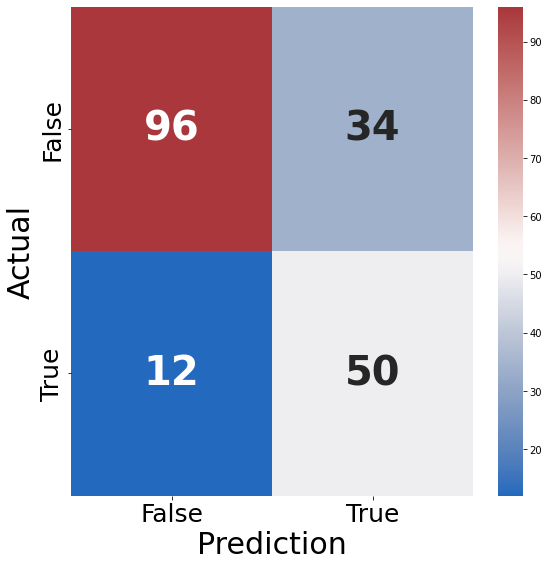

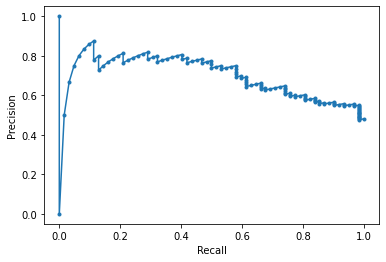

In [96]:
summary_of_model(grid_clf_log_cat3, Xcat3_train, Xcat3_test, ycat3_train, ycat3_test, thresh)

## A Pipeline Solution with all Data as Numerical

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
df = pd.read_csv('data/diabetes.csv')
df.columns = df.columns.str.lower()
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [98]:
y=df.pop('outcome')
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=TEST_FRACTION, random_state = RAND_STATE)

In [99]:
# In order to use an imputer, we'll need to set the zeros in glucose, bloodpressure, insulin, bmi to nan
df['glucose'].replace(0, np.NaN, inplace=True)
df['bloodpressure'].replace(0, np.NaN, inplace=True)
df['insulin'].replace(0, np.NaN, inplace=True)
df['bmi'].replace(0, np.NaN, inplace=True)
df['skinthickness'].replace(0, np.NaN, inplace=True)
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [100]:
cols_to_scale = ['pregnancies',  'glucose', 'bloodpressure', 'insulin', 'bmi', 'diabetespedigreefunction', 'age'  ]
numeric_transformer = Pipeline(steps = [('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())])
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, cols_to_scale)
    ]
)

Best Params: {'gradboost__learning_rate': 0.005, 'gradboost__max_depth': 2, 'gradboost__n_estimators': 500}, 
 Best score: 0.7622038980509744
0.3699999999999999
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       130
           1       0.67      0.74      0.70        62

    accuracy                           0.80       192
   macro avg       0.77      0.78      0.77       192
weighted avg       0.80      0.80      0.80       192

Recall of diabetes on the training set: 0.82
Accuracy on the training set: 0.79
Recall of diabetes class on the test set: 0.74
Accuracy on the test set: 0.80
[[107  23]
 [ 16  46]]


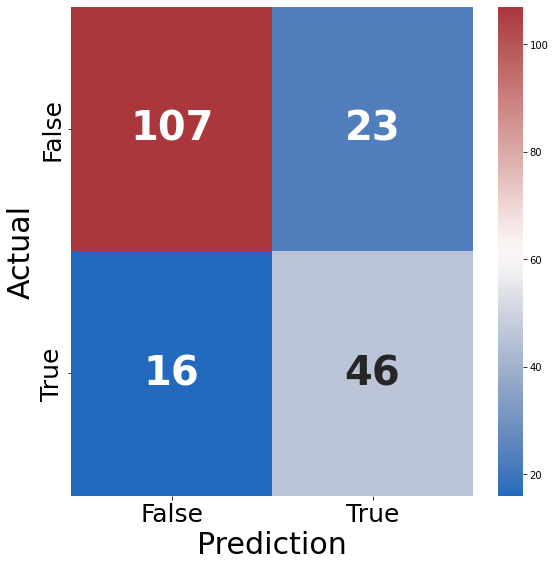

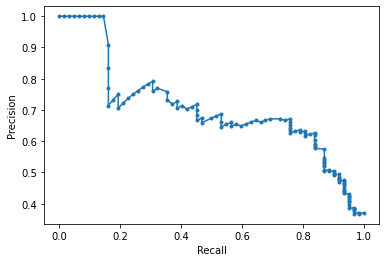

In [101]:
grid_values_boost = {'gradboost__n_estimators': [100, 200, 300, 400, 500],
                     'gradboost__learning_rate': [5e-3, 6e-3, 7e-3, 8e-3], 
                     'gradboost__max_depth': [2, 3]
                    }
clf_gradboost = GradientBoostingClassifier(random_state = RAND_STATE)
pipe = Pipeline([("preprocessor", preprocessor), ("gradboost", clf_gradboost)])
search = GridSearchCV(pipe, grid_values_boost, n_jobs=2)
search.fit(X_train, y_train)
print('Best Params: {}, \n Best score: {}'.format(search.best_params_, search.best_score_))
thresh = find_threshold(search, y_train, X_train)
print(thresh)
summary_of_model(search, X_train, X_test, y_train, y_test, thresh)

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       130
           1       0.68      0.45      0.54        62

    accuracy                           0.76       192
   macro avg       0.73      0.68      0.69       192
weighted avg       0.75      0.76      0.74       192

Recall of diabetes on the training set: 0.58
Accuracy on the training set: 0.80
Recall of diabetes class on the test set: 0.45
Accuracy on the test set: 0.76
[[117  13]
 [ 34  28]]


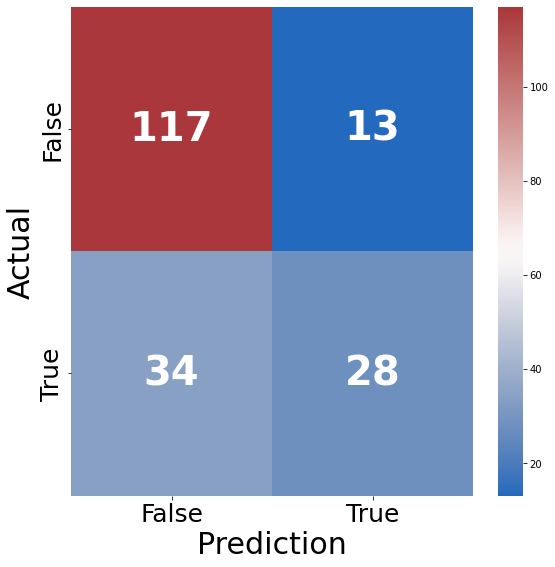

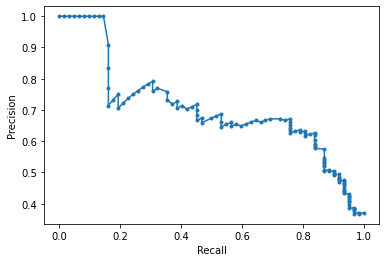

In [102]:
summary_of_model_nothresh(search, X_train, X_test, y_train, y_test)